<a href="https://colab.research.google.com/github/LerinaMM/data_analysis_covid19_udesc_work/blob/main/covid_udesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

## 2. Dicionário de dados

last_available_confirmed é a soma dos casos confirmados em cada cidade.

last_available_deaths é a soma das mortes em cada cidade.

estimated_population_2019 é a média da população estimada em 2019 para cada cidade.

##3. Exportando o dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos/Ciencia de dados Udesc/Trabalho 1/COVID/covid19_casos_brasil.csv')

In [ ]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [ ]:
df.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
353908,NaN,43.0,2020-07-12,29,11377239.0,True,False,39240,344.89914,2020-07-12,0.0245,962,125,state,RS,520,19
353909,NaN,42.0,2020-07-12,29,7164788.0,True,False,43031,600.59000,2020-07-12,0.0115,497,123,state,SC,1005,12
353910,NaN,28.0,2020-07-12,29,2298696.0,True,False,37631,1637.05858,2020-07-12,0.0261,984,121,state,SE,1585,30
353911,NaN,35.0,2020-07-12,29,45919049.0,True,False,371997,810.11477,2020-07-12,0.0480,17848,139,state,SP,5107,146
353912,NaN,17.0,2020-07-12,29,1572866.0,False,True,15132,962.06543,2020-07-11,0.0169,255,117,state,TO,0,0


#4. Pré Configurações

In [ ]:
#@title 4.1 Configuração de Data e Colunas
# Pré-Configuração

# Configurações Tabela
pd.set_option("display.max_columns", None) # exibir todas as colunas de um df do Pandas

# Definir o formato de exibição para números de ponto flutuante
pd.options.display.float_format = '{:.2f}'.format

# Configurar Gráfico
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 72

# Configurar para não exibir warnings -> https://pypi.org/project/nb-black/
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title 4.2 Definição de Cores
# Definições de cores -> todas estão numa escala de mais escura para mais clara
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

#5. Informações sobre o Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353913 entries, 0 to 353912
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   city                                           350615 non-null  object 
 1   city_ibge_code                                 352088 non-null  float64
 2   date                                           353913 non-null  object 
 3   epidemiological_week                           353913 non-null  int64  
 4   estimated_population_2019                      352088 non-null  float64
 5   is_last                                        353913 non-null  bool   
 6   is_repeated                                    353913 non-null  bool   
 7   last_available_confirmed                       353913 non-null  int64  
 8   last_available_confirmed_per_100k_inhabitants  344064 non-null  float64
 9   last_available_date                  

###5.1 Convertendo da coluna de data para datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353913 entries, 0 to 353912
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   city                                           350615 non-null  object        
 1   city_ibge_code                                 352088 non-null  float64       
 2   date                                           353913 non-null  datetime64[ns]
 3   epidemiological_week                           353913 non-null  int64         
 4   estimated_population_2019                      352088 non-null  float64       
 5   is_last                                        353913 non-null  bool          
 6   is_repeated                                    353913 non-null  bool          
 7   last_available_confirmed                       353913 non-null  int64         
 8   last_available_confirmed_per_100k_inhabitant

###5.2 Verificando as primeira e ultima data do dataset

In [ ]:
primeira_data = df['date'].min()
ultima_data = df['date'].max()

print('Primeira data:', primeira_data)
print('Última data:', ultima_data)

Primeira data: 2020-02-25 00:00:00
Última data: 2020-07-12 00:00:00


###5.3 Criando colunas novas de ano, mes e dia

---



In [ ]:
df['ano'] = df['date'].dt.year
df['mes'] = df['date'].dt.month
df['dia'] = df['date'].dt.day

In [ ]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia
0,São Paulo,3550308.00,2020-02-25,9,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0,2020,2,25
1,NaN,35.00,2020-02-25,9,45919049.00,False,False,1,0.00,2020-02-25,0.00,0,1,state,SP,1,0,2020,2,25
2,São Paulo,3550308.00,2020-02-26,9,12252023.00,False,False,1,0.01,2020-02-26,0.00,0,2,city,SP,0,0,2020,2,26
3,NaN,35.00,2020-02-26,9,45919049.00,False,False,1,0.00,2020-02-26,0.00,0,2,state,SP,0,0,2020,2,26
4,São Paulo,3550308.00,2020-02-27,9,12252023.00,False,False,1,0.01,2020-02-27,0.00,0,3,city,SP,0,0,2020,2,27


###5.3.1 Confirmando se as colunas ano, mes e dia foram criadas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353913 entries, 0 to 353912
Data columns (total 20 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   city                                           350615 non-null  object        
 1   city_ibge_code                                 352088 non-null  float64       
 2   date                                           353913 non-null  datetime64[ns]
 3   epidemiological_week                           353913 non-null  int64         
 4   estimated_population_2019                      352088 non-null  float64       
 5   is_last                                        353913 non-null  bool          
 6   is_repeated                                    353913 non-null  bool          
 7   last_available_confirmed                       353913 non-null  int64         
 8   last_available_confirmed_per_100k_inhabitant

##5.1 Verificação se temos dados duplicados

In [ ]:
df.duplicated().sum()

0

##4.2 Verificação tamanho do dataframe

In [ ]:
df.shape

(353913, 20)

##4.3 Valores ausentes

In [ ]:
#Valores em porcentagem

dados_ausentes = round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2).reset_index()
dados_ausentes

,index,0
0,last_available_confirmed_per_100k_inhabitants,0.03
1,city,0.01
2,estimated_population_2019,0.01
3,city_ibge_code,0.01
4,order_for_place,0.00
5,mes,0.00
6,ano,0.00
7,new_deaths,0.00
8,new_confirmed,0.00
9,state,0.00


In [ ]:
#verificando em quantidade de valores
valores_ausentes = df.isnull().sum()

In [ ]:
valores_ausentes

city                                             3298
city_ibge_code                                   1825
date                                                0
epidemiological_week                                0
estimated_population_2019                        1825
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants    9849
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
ano                                                 0
mes                         

In [ ]:
# Se quisermos preencher os valores ausentes (por exemplo, preenchendo com média, removendo linhas, etc.)
# Por exemplo,se formos preencher com a média:
#df.fillna(df.mean(), inplace=True)

##4.4 Analise da Coluna "City"

In [ ]:
#Vamos analisar melhor os valores ausentes na coluna "city"

num_missing = df['city'].isnull().sum()
print(f'Numero de valores ausentes na coluna "city": {num_missing}')

Numero de valores ausentes na coluna "city": 3298


In [ ]:
#Verificamos que possuimos linhas de cidade indicando a seguinte informação: "Importados/Indefinidos" vamos analisar essa questão

num_importados_indefinidos = (df['city'] == 'Importados/Indefinidos').sum()

print(f'Número de linhas com "city" como "Importados/Indefinidos": {num_importados_indefinidos}')

Número de linhas com "city" como "Importados/Indefinidos": 1825


In [ ]:
#Verificamos que possuimos linhas de cidade indicando a seguinte informação: "NaN" vamos analisar essa questão

num_nan = (df['city'] == 'NaN').sum()

print(f'Número de linhas com "city" como "NaN": {num_nan}')

Número de linhas com "city" como "NaN": 0


In [ ]:
# Filtrar dados onde possuimos a descrição para a cidade de Importados/Indefinidos para verificar a quantidade

filtro_importados_indefinidos = df.query('city == "Importados/Indefinidos" & place_type == "city"')

In [ ]:
filtro_importados_indefinidos

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia
193,Importados/Indefinidos,NaN,2020-03-14,11,NaN,False,False,1,NaN,2020-03-14,0.00,0,1,city,PE,1,0,2020,3,14
241,Importados/Indefinidos,NaN,2020-03-15,12,NaN,False,False,1,NaN,2020-03-15,0.00,0,2,city,PE,0,0,2020,3,15
295,Importados/Indefinidos,NaN,2020-03-16,12,NaN,False,True,1,NaN,2020-03-15,0.00,0,3,city,PE,0,0,2020,3,16
361,Importados/Indefinidos,NaN,2020-03-17,12,NaN,False,False,2,NaN,2020-03-17,0.00,0,4,city,PE,1,0,2020,3,17
438,Importados/Indefinidos,NaN,2020-03-18,12,NaN,False,False,3,NaN,2020-03-18,0.00,0,5,city,PE,1,0,2020,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352136,Importados/Indefinidos,NaN,2020-07-12,29,NaN,False,True,88,NaN,2020-07-10,0.07,6,107,city,RN,0,0,2020,7,12
352276,Importados/Indefinidos,NaN,2020-07-12,29,NaN,True,False,0,NaN,2020-07-12,0.00,0,80,city,RO,0,0,2020,7,12
352315,Importados/Indefinidos,NaN,2020-07-12,29,NaN,False,True,331,NaN,2020-07-11,0.00,1,74,city,RR,0,0,2020,7,12
352867,Importados/Indefinidos,NaN,2020-07-12,29,NaN,True,False,667,NaN,2020-07-12,0.00,0,110,city,SC,9,0,2020,7,12


Temos 1825 linhas com esses dados, que não fornece uma informação precisa da cidade onde esse fato ocorreu, dessa forma vamos eliminar essas colunas

In [ ]:
#Vamos eliminar as linhas onde a coluna "city" indica "Importados/Indefinidos"

df = df[df['city'] != 'Importados/Indefinidos']

In [ ]:
filtro_importados_indefinidos = df.query('city == "Importados/Indefinidos" & place_type == "city"')

In [ ]:
filtro_importados_indefinidos

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia


Confirmação de eliminação das linhas

##4.4 Criação de nova coluna chamada "region" para conseguirmos separar as cidades por região que será altamente utilizada nas analises

In [ ]:
#Dicionário mapeando cada estado para a sua região

region = {
    'AC': 'Norte',
    'AP': 'Norte',
    'AM': 'Norte',
    'PA': 'Norte',
    'RO': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'AL': 'Nordeste',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RN': 'Nordeste',
    'SE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'ES': 'Sudeste',
    'MG': 'Sudeste',
    'RJ': 'Sudeste',
    'SP': 'Sudeste',
    'PR': 'Sul',
    'RS': 'Sul',
    'SC': 'Sul'
}

#Criar a nova coluna "region" mapeando a coluna "state" para as regiões

df['regiao'] = df['state'].map(region)

In [ ]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
0,São Paulo,3550308.00,2020-02-25,9,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0,2020,2,25,Sudeste
1,NaN,35.00,2020-02-25,9,45919049.00,False,False,1,0.00,2020-02-25,0.00,0,1,state,SP,1,0,2020,2,25,Sudeste
2,São Paulo,3550308.00,2020-02-26,9,12252023.00,False,False,1,0.01,2020-02-26,0.00,0,2,city,SP,0,0,2020,2,26,Sudeste
3,NaN,35.00,2020-02-26,9,45919049.00,False,False,1,0.00,2020-02-26,0.00,0,2,state,SP,0,0,2020,2,26,Sudeste
4,São Paulo,3550308.00,2020-02-27,9,12252023.00,False,False,1,0.01,2020-02-27,0.00,0,3,city,SP,0,0,2020,2,27,Sudeste


##4.5 Estatísticas Descritivas

In [ ]:
df.describe()

,city_ibge_code,date,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,ano,mes,dia
count,352088.00,352088,352088.00,352088.00,352088.00,344064.00,352088.00,352088.00,352088.00,352088.00,352088.00,352088.00,352088.00,352088.00
mean,3142812.57,2020-06-04 00:34:29.400831488,23.14,134739.68,324.83,253.03,0.05,15.53,38.98,10.52,0.41,2020.00,5.64,15.18
min,11.00,2020-02-25 00:00:00,9.00,837.00,0.00,0.00,0.00,0.00,1.00,-415.00,-22.00,2020.00,2.00,1.00
25%,2411106.00,2020-05-17 00:00:00,21.00,7659.00,2.00,20.94,0.00,0.00,17.00,0.00,0.00,2020.00,5.00,7.00
50%,3134004.00,2020-06-08 00:00:00,24.00,17055.00,11.00,75.44,0.00,0.00,35.00,0.00,0.00,2020.00,6.00,14.00
75%,4106209.00,2020-06-26 00:00:00,26.00,38166.00,53.00,260.83,0.04,2.00,57.00,2.00,0.00,2020.00,6.00,23.00
max,5300108.00,2020-07-12 00:00:00,29.00,45919049.00,371997.00,13089.32,1.00,17848.00,139.00,19030.00,434.00,2020.00,7.00,31.00
std,1024139.54,NaN,3.74,1242127.39,4153.12,507.74,0.14,241.38,26.13,126.23,5.68,0.00,0.93,8.97


In [ ]:
#correlation_matrix = df.corr()

## 5. Analise do Dataframe

### 5.1 Agrupando os dados por cidade e estado e calcule as para calculo das métricas desejadas

In [ ]:
df_sorted = df.sort_values(by='last_available_confirmed_per_100k_inhabitants', ascending=False)

In [ ]:
df_sorted

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
348736,Pedra Branca do Amapari,1600154.00,2020-07-12,29,16502.00,True,False,2160,13089.32,2020-07-12,0.00,5,81,city,AP,18,0,2020,7,12,Norte
343366,Pedra Branca do Amapari,1600154.00,2020-07-11,28,16502.00,False,True,2142,12980.24,2020-07-10,0.00,5,80,city,AP,0,0,2020,7,11,Norte
337997,Pedra Branca do Amapari,1600154.00,2020-07-10,28,16502.00,False,False,2142,12980.24,2020-07-10,0.00,5,79,city,AP,9,0,2020,7,10,Norte
332635,Pedra Branca do Amapari,1600154.00,2020-07-09,28,16502.00,False,False,2133,12925.71,2020-07-09,0.00,5,78,city,AP,13,0,2020,7,9,Norte
327279,Pedra Branca do Amapari,1600154.00,2020-07-08,28,16502.00,False,False,2120,12846.93,2020-07-08,0.00,5,77,city,AP,25,0,2020,7,8,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352908,Major Vieira,4210308.00,2020-07-12,29,8103.00,True,False,0,NaN,2020-07-12,0.00,0,26,city,SC,0,0,2020,7,12,Sul
352931,Painel,4211892.00,2020-07-12,29,2359.00,True,False,0,NaN,2020-07-12,0.00,0,16,city,SC,0,0,2020,7,12,Sul
353167,Balbinos,3504701.00,2020-07-12,29,5735.00,False,True,0,NaN,2020-07-11,0.00,0,24,city,SP,0,0,2020,7,12,Sudeste
353464,Monte Castelo,3531605.00,2020-07-12,29,4166.00,False,True,0,NaN,2020-07-11,0.00,0,24,city,SP,0,0,2020,7,12,Sudeste


###5.2 Agrupando casos de estados com mais casos por milhão de habitantes

In [ ]:
top_states_cases_per_million = df_sorted.groupby('state')['last_available_confirmed_per_100k_inhabitants'].max().sort_values(ascending=False)[:10]
top_states_cases_per_million = top_states_cases_per_million.reset_index()
top_states_cases_per_million.columns = ['Estados', 'Total de Casos dos estados por Milhao']

#
top_states_cases_per_million = top_states_cases_per_million.sort_values(by='Total de Casos dos estados por Milhao', ascending=True)

### 5.4 Vamos ordenar o dataframe em ordem decrescente pelo valor "total de casos por Milhão"

In [ ]:
top_states_cases_per_million = top_states_cases_per_million.sort_values(by='Total de Casos dos estados por Milhao', ascending=True)

### 5.5 Formatação do grafico

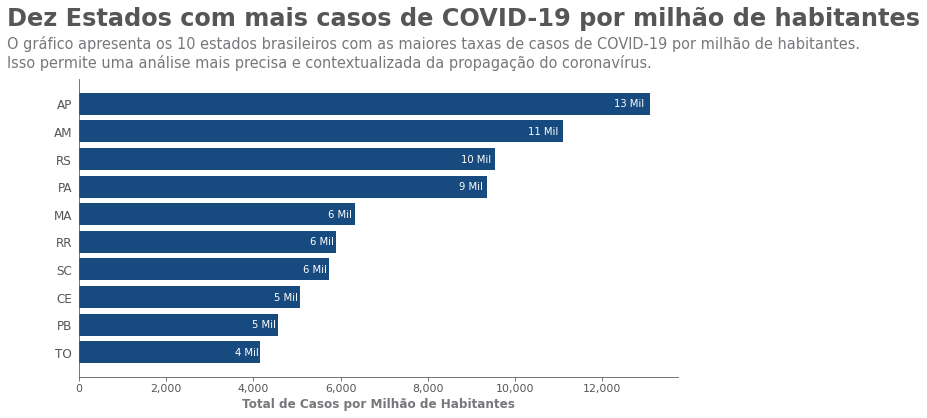

In [ ]:
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criar o gráfico de barras horizontais
bar_million_cases = ax.barh(top_states_cases_per_million['Estados'], top_states_cases_per_million['Total de Casos dos estados por Milhao'], color=AZUL1)

# Formatar os números sem notação científica
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['bottom'].set_color(CINZA3)
ax.spines['left'].set_color(CINZA3)

# Configurar rótulos do eixo y
ax.set_xlabel('Total de Casos por Milhão de Habitantes', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA3, labelsize=11)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover ticks dos eixo y
ax.tick_params(left=False)

# Formatação dos rótulos de numeral completo para arredondado e milhares
def formatar_rotulo(valor):
    valor_arredondado = round(valor / 1000)
    return f'{valor_arredondado} Mil'

# Formatação dos rótulos de numeral completo para arredondado e milhares
def formatar_rotulo(valor):
    valor_arredondado = round(valor / 1000)
    return f'{valor_arredondado} Mil'

# Adicionar rótulos de dados formatados
for rect in bar_million_cases:
    width = rect.get_width()
    label = formatar_rotulo(width)
    ax.text(rect.get_x() + rect.get_width() / 1.01, rect.get_y() + rect.get_height() / 2,
            label, ha='right', va='center', color='white')

# Título
ax.text(-0.12, 1.18,'Dez Estados com mais casos de COVID-19 por milhão de habitantes',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.12, 1.04,'O gráfico apresenta os 10 estados brasileiros com as maiores taxas de'
                      ' casos de COVID-19 por milhão de habitantes.\nIsso permite'
                      ' uma análise mais precisa e contextualizada da propagação do coronavírus.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Apresentar o gráfico
plt.show()

In [ ]:
# Agrupe os dados por data e calcule o total de casos confirmados
daily_cases = df.groupby('date')['last_available_confirmed'].sum()

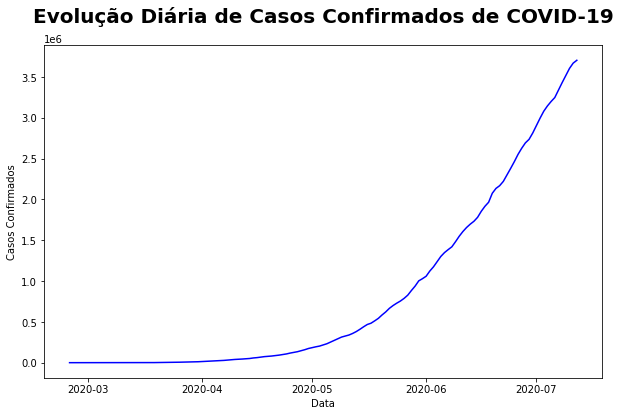

In [ ]:
# Crie um gráfico de linha para visualizar a evolução dos casos

plt.figure(figsize=(10, 6))
plt.plot(daily_cases.index, daily_cases.values, color='b')


plt.title('Evolução Diária de Casos Confirmados de COVID-19', fontsize=20, y=1.05, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.grid(False)
plt.show()

## **RESPOSTA NUMERO 1**

Apresentar grafico do crescimento de casos e mortes de Joinville e os das capitais das regiões Sul e Sudeste. Descreva observações sobre esses gráficos

In [ ]:
df_joinville = df.query('city == "Joinville"')

In [ ]:
df_joinville.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
162,Joinville,4209102.00,2020-03-13,11,590466.00,False,False,1,0.17,2020-03-13,0.00,0,1,city,SC,1,0,2020,3,13,Sul
205,Joinville,4209102.00,2020-03-14,11,590466.00,False,False,1,0.17,2020-03-14,0.00,0,2,city,SC,0,0,2020,3,14,Sul
254,Joinville,4209102.00,2020-03-15,12,590466.00,False,False,1,0.17,2020-03-15,0.00,0,3,city,SC,0,0,2020,3,15,Sul
308,Joinville,4209102.00,2020-03-16,12,590466.00,False,False,1,0.17,2020-03-16,0.00,0,4,city,SC,0,0,2020,3,16,Sul
378,Joinville,4209102.00,2020-03-17,12,590466.00,False,False,1,0.17,2020-03-17,0.00,0,5,city,SC,0,0,2020,3,17,Sul


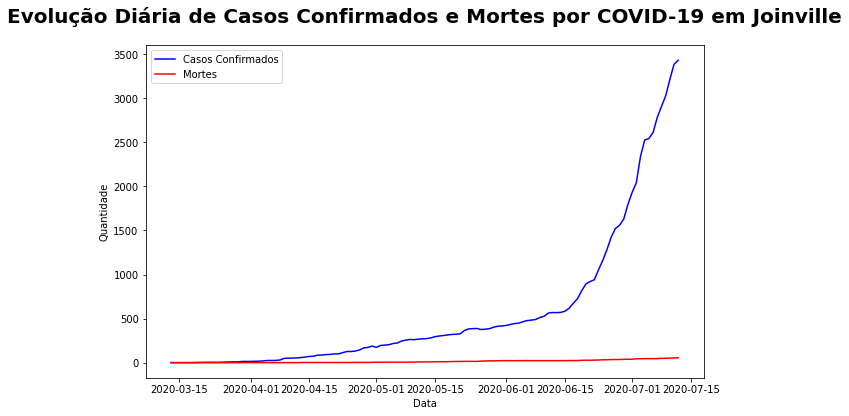

In [ ]:
# Filtrar dados para a cidade de Joinville
joinville_data = df[df['city'] == 'Joinville']

# Criar gráfico de linha para casos confirmados e mortes
plt.figure(figsize=(10, 6))
plt.plot(joinville_data['date'], joinville_data['last_available_confirmed'], color='b', label='Casos Confirmados')
plt.plot(joinville_data['date'], joinville_data['last_available_deaths'], color='r', label='Mortes')

plt.title('Evolução Diária de Casos Confirmados e Mortes por COVID-19 em Joinville', fontsize=20, y=1.05, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(False)
plt.show()

##Capitais da Região Sul

In [ ]:
# Filtrar as cidades da região Sul

cidades_regiao_sul = df[(df['regiao'] == 'Sul') & (df['place_type'] == 'city')]

#Listando as capitais da região Sul

capitais_sul = ['Porto Alegre', 'Curitiba', 'Florianópolis']

#Filtrando as capitais

capitais_regiao_sul = cidades_regiao_sul[cidades_regiao_sul['city'].isin(capitais_sul)]

In [ ]:
capitais_regiao_sul

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
96,Porto Alegre,4314902.00,2020-03-11,11,1483771.00,False,False,1,0.07,2020-03-11,0.00,0,1,city,RS,1,0,2020,3,11,Sul
116,Curitiba,4106902.00,2020-03-12,11,1933105.00,False,False,5,0.26,2020-03-12,0.00,0,1,city,PR,5,0,2020,3,12,Sul
123,Porto Alegre,4314902.00,2020-03-12,11,1483771.00,False,False,2,0.13,2020-03-12,0.00,0,2,city,RS,1,0,2020,3,12,Sul
124,Florianópolis,4205407.00,2020-03-12,11,500973.00,False,False,2,0.40,2020-03-12,0.00,0,1,city,SC,2,0,2020,3,12,Sul
153,Curitiba,4106902.00,2020-03-13,11,1933105.00,False,False,5,0.26,2020-03-13,0.00,0,2,city,PR,0,0,2020,3,13,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347233,Porto Alegre,4314902.00,2020-07-11,28,1483771.00,False,False,3912,263.65,2020-07-11,0.04,152,123,city,RS,124,1,2020,7,11,Sul
347469,Florianópolis,4205407.00,2020-07-11,28,500973.00,False,False,2041,407.41,2020-07-11,0.01,26,122,city,SC,61,3,2020,7,11,Sul
351700,Curitiba,4106902.00,2020-07-12,29,1933105.00,False,True,8431,436.14,2020-07-10,0.02,210,123,city,PR,0,0,2020,7,12,Sul
352605,Porto Alegre,4314902.00,2020-07-12,29,1483771.00,True,False,3928,264.73,2020-07-12,0.04,157,124,city,RS,16,5,2020,7,12,Sul


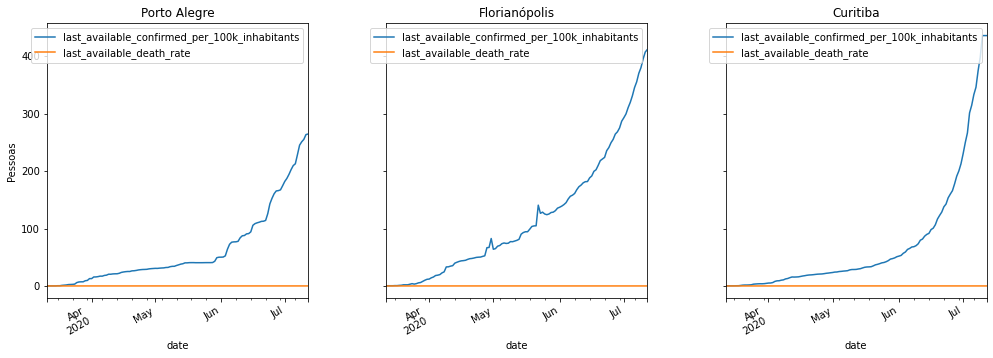

In [ ]:
#Fazer grafico lado a lado com a mesma proporção do eixo y para as cidades de Porto Alegre, Florianópolis e Curitiba

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,5))

lines = ['last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate']
capitais_regiao_sul[capitais_regiao_sul['city'] == 'Porto Alegre'].plot('date', lines, ax=ax1)
capitais_regiao_sul[capitais_regiao_sul['city'] == 'Florianópolis'].plot('date', lines, ax=ax2)
capitais_regiao_sul[capitais_regiao_sul['city'] == 'Curitiba'].plot('date', lines, ax=ax3)

ax1.set_title('Porto Alegre')
ax2.set_title('Florianópolis')
ax3.set_title('Curitiba')
ax1.set_ylabel('Pessoas')

#Ajuste das labels dos tres graficos
for ax in [ax1, ax2, ax3]:
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.subplots_adjust(left=0.11, bottom=0.175, right=0.980, top=0.940, wspace=0.3, hspace=None)


In [ ]:
# Vamos ordenar os dados pela taxa de mortalidade para aparecer no grafico da maior taxa para a menor

capitais_regiao_sul = capitais_regiao_sul.sort_values('last_available_death_rate', ascending=False)

Visualização das taxas de mortalidade das capitais da região Sul:


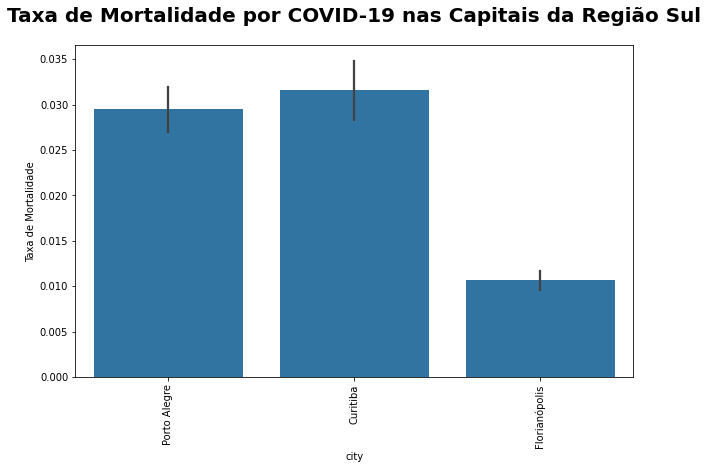

In [ ]:
# Avaliando a taxa de mortalidade das capitais da região Sul utilizando os dados da coluna "last_available_death_rate"

print("Visualização das taxas de mortalidade das capitais da região Sul:")
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='last_available_death_rate', data=capitais_regiao_sul)
plt.xticks(rotation=90)
plt.ylabel('Taxa de Mortalidade')
plt.title('Taxa de Mortalidade por COVID-19 nas Capitais da Região Sul', fontsize=20, y=1.05, fontweight='bold')
plt.show()

Neste caso podemos concluir que por mais que a capital de Santa Catarina, Florianópolis, tenha tido o maior crescimento de casos confirmados, esses casos não necessariamente se confirmaram em mortes, onde podemos verificar que a capital Paranaense, Curitiba que obteve a maior taxa de mortalidade, seguida de porto Alegre.

##Capitais da Região Sudeste

In [ ]:
# Filtrar as cidades da região Sudeste

cidades_regiao_sudeste = df[(df['regiao'] == 'Sudeste') & (df['place_type'] == 'city')]

#Listando as capitais da região Sudeste

capitais_sudeste = ['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte' ]

#Filtrando as capitais

capitais_regiao_sudeste = cidades_regiao_sudeste[cidades_regiao_sudeste['city'].isin(capitais_sudeste)]

In [ ]:
capitais_regiao_sudeste.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
0,São Paulo,3550308.00,2020-02-25,9,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0,2020,2,25,Sudeste
2,São Paulo,3550308.00,2020-02-26,9,12252023.00,False,False,1,0.01,2020-02-26,0.00,0,2,city,SP,0,0,2020,2,26,Sudeste
4,São Paulo,3550308.00,2020-02-27,9,12252023.00,False,False,1,0.01,2020-02-27,0.00,0,3,city,SP,0,0,2020,2,27,Sudeste
6,São Paulo,3550308.00,2020-02-28,9,12252023.00,False,False,2,0.02,2020-02-28,0.00,0,4,city,SP,1,0,2020,2,28,Sudeste
8,São Paulo,3550308.00,2020-02-29,9,12252023.00,False,False,2,0.02,2020-02-29,0.00,0,5,city,SP,0,0,2020,2,29,Sudeste


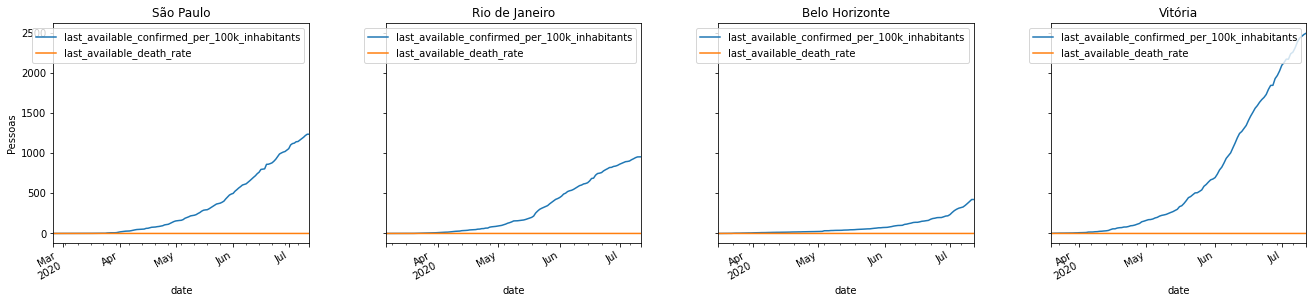

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True, figsize=(20,4))

lines = ['last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate']
capitais_regiao_sudeste[capitais_regiao_sudeste['city'] == 'São Paulo'].plot('date', lines, ax=ax1)
capitais_regiao_sudeste[capitais_regiao_sudeste['city'] == 'Rio de Janeiro'].plot('date', lines, ax=ax2)
capitais_regiao_sudeste[capitais_regiao_sudeste['city'] == 'Belo Horizonte'].plot('date', lines, ax=ax3)
capitais_regiao_sudeste[capitais_regiao_sudeste['city'] == 'Vitória'].plot('date', lines, ax=ax4)

ax1.set_title('São Paulo')
ax2.set_title('Rio de Janeiro')
ax3.set_title('Belo Horizonte')
ax4.set_title('Vitória')
ax1.set_ylabel('Pessoas')

#Ajuste das labels dos tres graficos
for ax in [ax1, ax2, ax3, ax4]:
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.subplots_adjust(left=0.11, bottom=0.175, right=0.980, top=0.940, wspace=0.3, hspace=None)

In [ ]:
# Vamos ordenar os dados pela taxa de mortalidade para aparecer no grafico da maior taxa para a menor

capitais_regiao_sudeste = capitais_regiao_sudeste.sort_values('last_available_death_rate', ascending=False)

Visualização das taxas de mortalidade das capitais da região Sudeste:


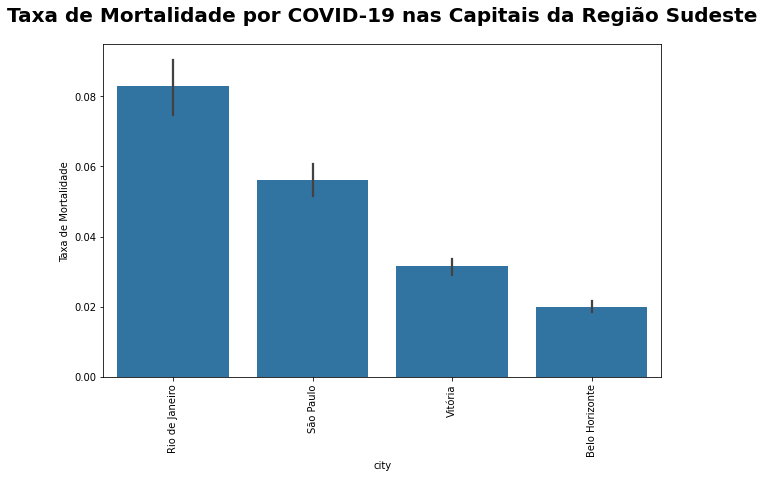

In [ ]:
# Avaliando a taxa de mortalidade das capitais da região Sudeste utilizando os dados da coluna "last_available_death_rate"

print("Visualização das taxas de mortalidade das capitais da região Sudeste:")
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='last_available_death_rate', data=capitais_regiao_sudeste)
plt.xticks(rotation=90)
plt.ylabel('Taxa de Mortalidade')
plt.title('Taxa de Mortalidade por COVID-19 nas Capitais da Região Sudeste', fontsize=20, y=1.05, fontweight='bold')
plt.show()

## **RESPOSTA NUMERO 2**

Correlacionar os casos e mortes com a sua população para todas as capitais brasileiras. QUais são as cinco cidades com maiores problemas, quais são as 5 cidades com menores problemas?

In [ ]:
#Vamos listar todas as capitais Brasileiras

capitais_brasil = ['Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador', 'Fortaleza',
    'Brasília', 'Vitória', 'Goiânia', 'São Luís', 'Cuiabá', 'Campo Grande',
    'Belo Horizonte', 'Belém', 'João Pessoa', 'Curitiba', 'Recife', 'Teresina',
    'Rio de Janeiro', 'Natal', 'Porto Alegre', 'Porto Velho', 'Boa Vista',
    'Florianópolis', 'São Paulo', 'Aracaju', 'Palmas']

In [ ]:
#Vamos fazer um filtro no dataframe para deixar somente as capitais

df_capitais = df[df['city'].isin(capitais_brasil)]

In [ ]:
df_capitais

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
0,São Paulo,3550308.00,2020-02-25,9,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0,2020,2,25,Sudeste
2,São Paulo,3550308.00,2020-02-26,9,12252023.00,False,False,1,0.01,2020-02-26,0.00,0,2,city,SP,0,0,2020,2,26,Sudeste
4,São Paulo,3550308.00,2020-02-27,9,12252023.00,False,False,1,0.01,2020-02-27,0.00,0,3,city,SP,0,0,2020,2,27,Sudeste
6,São Paulo,3550308.00,2020-02-28,9,12252023.00,False,False,2,0.02,2020-02-28,0.00,0,4,city,SP,1,0,2020,2,28,Sudeste
8,São Paulo,3550308.00,2020-02-29,9,12252023.00,False,False,2,0.02,2020-02-29,0.00,0,5,city,SP,0,0,2020,2,29,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352605,Porto Alegre,4314902.00,2020-07-12,29,1483771.00,True,False,3928,264.73,2020-07-12,0.04,157,124,city,RS,16,5,2020,7,12,Sul
352842,Florianópolis,4205407.00,2020-07-12,29,500973.00,True,False,2064,412.00,2020-07-12,0.01,26,123,city,SC,23,0,2020,7,12,Sul
353049,Aracaju,2800308.00,2020-07-12,29,657013.00,False,True,19638,2988.98,2020-07-11,0.02,398,121,city,SE,0,0,2020,7,12,Nordeste
353684,São Paulo,3550308.00,2020-07-12,29,12252023.00,False,True,151365,1235.43,2020-07-11,0.05,8176,139,city,SP,0,0,2020,7,12,Sudeste


In [ ]:
#Vamos verificar se tem valores nulos

print(df_capitais[['last_available_death_rate', 'estimated_population_2019']].isnull().sum())

last_available_death_rate    0
estimated_population_2019    0
dtype: int64


In [ ]:
# Vamos ordenar os dados pela taxa de mortalidade para aparecer no grafico da maior taxa para a menor

df_capitais = df_capitais.sort_values('last_available_death_rate', ascending=False)

In [ ]:
df_capitais

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
149764,Belém,2700805.00,2020-06-02,23,4344.00,False,False,2,46.04,2020-06-02,0.50,1,12,city,AL,0,0,2020,6,2,Nordeste
112588,Belém,2700805.00,2020-05-24,22,4344.00,False,False,2,46.04,2020-05-24,0.50,1,3,city,AL,1,1,2020,5,24,Nordeste
190496,Belém,2700805.00,2020-06-11,24,4344.00,False,False,2,46.04,2020-06-11,0.50,1,21,city,AL,0,0,2020,6,11,Nordeste
120489,Belém,2700805.00,2020-05-26,22,4344.00,False,False,2,46.04,2020-05-26,0.50,1,5,city,AL,0,0,2020,5,26,Nordeste
116523,Belém,2700805.00,2020-05-25,22,4344.00,False,False,2,46.04,2020-05-25,0.50,1,4,city,AL,0,0,2020,5,25,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6159,Palmas,1721000.00,2020-04-04,14,299127.00,False,False,11,3.68,2020-04-04,0.00,0,18,city,TO,1,0,2020,4,4,Norte
5851,Palmas,4117602.00,2020-04-04,14,50986.00,False,False,1,1.96,2020-04-04,0.00,0,1,city,PR,1,0,2020,4,4,Sul
5829,Curitiba,4106902.00,2020-04-04,14,1933105.00,False,False,153,7.91,2020-04-04,0.00,0,24,city,PR,39,0,2020,4,4,Sul
5771,Belém,1501402.00,2020-04-04,14,1492745.00,False,False,45,3.01,2020-04-04,0.00,0,18,city,PA,3,0,2020,4,4,Norte


In [ ]:
# Certifique-se de que 'last_available_death_rate' esteja no tipo correto para ordenação

df_capitais['last_available_death_rate'] = pd.to_numeric(df_capitais['last_available_death_rate'], errors='coerce')

Visualização das taxas de mortalidade das capitais:


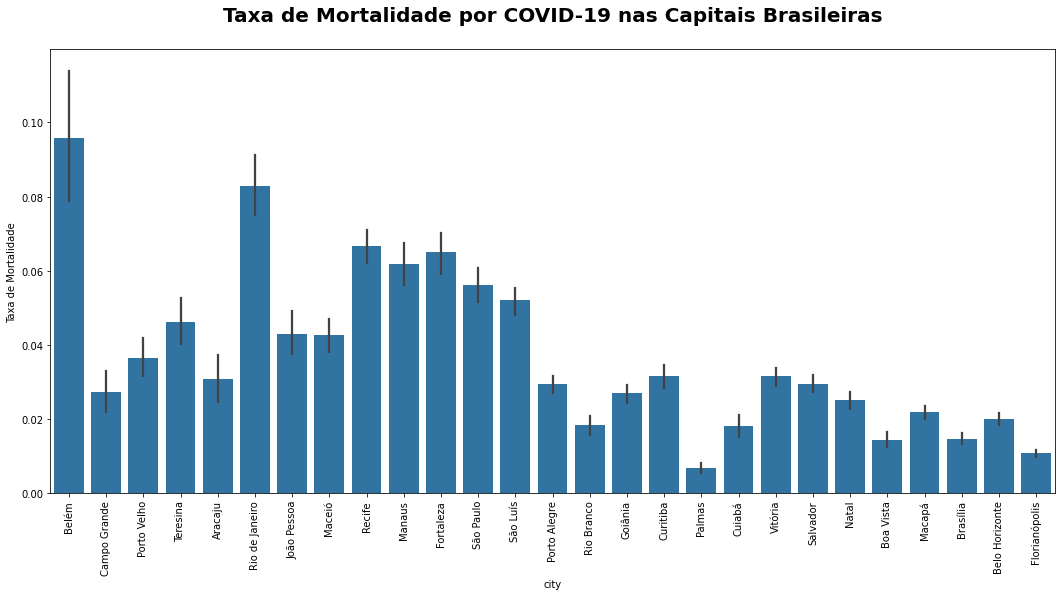

In [ ]:
# Avaliando a taxa de mortalidade das capitais brasileiras utilizando os dados da coluna "last_available_death_rate"

print("Visualização das taxas de mortalidade das capitais:")
plt.figure(figsize=(18, 8))
sns.barplot(x='city', y='last_available_death_rate', data=df_capitais)
plt.xticks(rotation=90)
plt.ylabel('Taxa de Mortalidade')
plt.title('Taxa de Mortalidade por COVID-19 nas Capitais Brasileiras', fontsize=20, y=1.05, fontweight='bold')
plt.show()

In [ ]:
cidades_brasil = df.query('place_type == "city"')

In [ ]:
cidades_brasil = cidades_brasil.sort_values('last_available_death_rate', ascending=False)

In [ ]:
# Selecionando as 5 cidades com a maior taxa de mortalidade

highest_death_rate_cities = cidades_brasil.head(5)

In [ ]:
highest_death_rate_cities

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
28782,Bonfim,3108107.00,2020-04-24,17,6868.00,False,False,1,14.56,2020-04-24,1.00,1,13,city,MG,0,0,2020,4,24,Sudeste
57112,Aurora,2301703.00,2020-05-07,19,24654.00,False,False,1,4.06,2020-05-07,1.00,1,5,city,CE,0,0,2020,5,7,Nordeste
40286,Miraíma,2308377.00,2020-04-30,18,13818.00,False,False,1,7.24,2020-04-30,1.00,1,5,city,CE,0,0,2020,4,30,Nordeste
57093,Água Fria,2900405.00,2020-05-07,19,16970.00,False,False,1,5.89,2020-05-07,1.00,1,17,city,BA,0,0,2020,5,7,Nordeste
12166,Utinga,2932804.00,2020-04-12,16,19178.00,False,False,1,5.21,2020-04-12,1.00,1,10,city,BA,0,0,2020,4,12,Nordeste


In [ ]:
# Selecionando as 5 cidades com a menor taxa de mortalidade

lowest_death_rate_cities = cidades_brasil.tail(5)

In [ ]:
lowest_death_rate_cities

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
208880,Ibirarema,3519501.00,2020-06-14,25,7753.00,False,False,9,116.08,2020-06-14,0.00,0,41,city,SP,0,0,2020,6,14,Sudeste
208881,Ibirá,3519402.00,2020-06-14,25,12393.00,False,False,4,32.28,2020-06-14,0.00,0,65,city,SP,0,0,2020,6,14,Sudeste
87517,Santa Bárbara,2927507.00,2020-05-17,21,20791.00,False,False,9,43.29,2020-05-17,0.00,0,20,city,BA,0,0,2020,5,17,Nordeste
87515,Ruy Barbosa,2927200.00,2020-05-17,21,30814.00,False,False,1,3.25,2020-05-17,0.00,0,5,city,BA,0,0,2020,5,17,Nordeste
0,São Paulo,3550308.00,2020-02-25,9,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0,2020,2,25,Sudeste


In [ ]:
# Mostrando resultados analisando as cidades brasileiras com a maior taxa de Mortalidade

print("Cidades com a Maior Taxa de Mortalidade:")
print(highest_death_rate_cities[['city', 'state', 'last_available_death_rate']])

Cidades com a Maior Taxa de Mortalidade:
            city state  last_available_death_rate
28782     Bonfim    MG                       1.00
57112     Aurora    CE                       1.00
40286    Miraíma    CE                       1.00
57093  Água Fria    BA                       1.00
12166     Utinga    BA                       1.00


Podemos notar que as cidades que possuiram um desempenho das maiores taxas de mortalidade começando pela cidade de Bonfim em Minas Gerais, seguida de mais 4 cidades da região Nordeste do Brasil

In [ ]:
# Mostrando resultados das cidades brasileiras com a menor taxa de Mortalidade

print("\nCidades com a Menor Taxa de Mortalidade:")
print(lowest_death_rate_cities[['city', 'state', 'last_available_death_rate']])


Cidades com a Menor Taxa de Mortalidade:
                 city state  last_available_death_rate
208880      Ibirarema    SP                       0.00
208881          Ibirá    SP                       0.00
87517   Santa Bárbara    BA                       0.00
87515     Ruy Barbosa    BA                       0.00
0           São Paulo    SP                       0.00


## **RESPOSTA NUMERO 3**

Correlacionar os casos e mortes com a sua população para as cidades conforme o seu grupo. QUais são as tres cidades com maiores problemas? Listar o nome das suas cidades e população

#Listar casos da cidade de Blumenau

In [ ]:
df_blumenau = df.query('city == "Blumenau"')

In [ ]:
df_blumenau.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
1042,Blumenau,4202404.00,2020-03-22,13,357199.00,False,False,6,1.68,2020-03-22,0.00,0,1,city,SC,6,0,2020,3,22,Sul
1247,Blumenau,4202404.00,2020-03-23,13,357199.00,False,False,7,1.96,2020-03-23,0.00,0,2,city,SC,1,0,2020,3,23,Sul
1472,Blumenau,4202404.00,2020-03-24,13,357199.00,False,False,7,1.96,2020-03-24,0.00,0,3,city,SC,0,0,2020,3,24,Sul
1715,Blumenau,4202404.00,2020-03-25,13,357199.00,False,False,9,2.52,2020-03-25,0.00,0,4,city,SC,2,0,2020,3,25,Sul
1989,Blumenau,4202404.00,2020-03-26,13,357199.00,False,False,12,3.36,2020-03-26,0.00,0,5,city,SC,3,0,2020,3,26,Sul


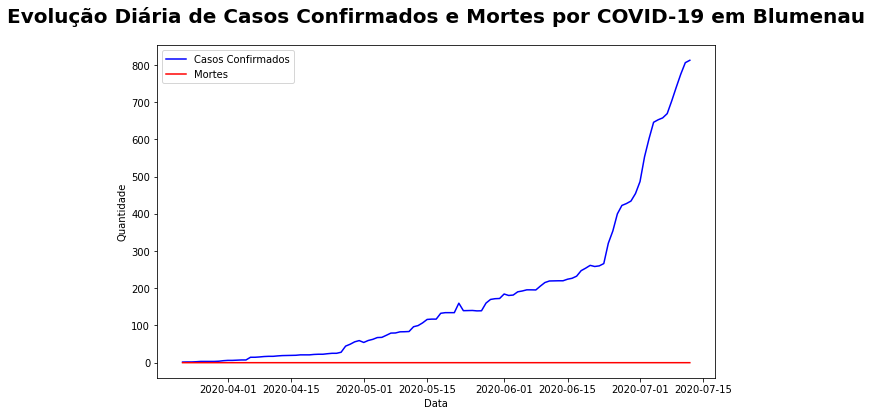

In [ ]:
# Filtrar dados para a cidade de Blumenau
blumenau_data = df[df['city'] == 'Blumenau']

# Criar gráfico de linha para casos confirmados e mortes
plt.figure(figsize=(10, 6))
plt.plot(blumenau_data['date'], blumenau_data['last_available_confirmed_per_100k_inhabitants'], color='b', label='Casos Confirmados')
plt.plot(blumenau_data['date'], blumenau_data['last_available_death_rate'], color='r', label='Mortes')

plt.title('Evolução Diária de Casos Confirmados e Mortes por COVID-19 em Blumenau', fontsize=20, y=1.05, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(False)
plt.show()

#Listar casos da cidade de Maringá

In [ ]:
df_maringa = df.query('city == "Maringá"')

In [ ]:
df_maringa.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
446,Maringá,4115200.00,2020-03-18,12,423666.00,False,False,1,0.24,2020-03-18,0.00,0,1,city,PR,1,0,2020,3,18,Sul
549,Maringá,4115200.00,2020-03-19,12,423666.00,False,False,1,0.24,2020-03-19,0.00,0,2,city,PR,0,0,2020,3,19,Sul
676,Maringá,4115200.00,2020-03-20,12,423666.00,False,False,1,0.24,2020-03-20,0.00,0,3,city,PR,0,0,2020,3,20,Sul
822,Maringá,4115200.00,2020-03-21,12,423666.00,False,False,1,0.24,2020-03-21,0.00,0,4,city,PR,0,0,2020,3,21,Sul
998,Maringá,4115200.00,2020-03-22,13,423666.00,False,False,1,0.24,2020-03-22,0.00,0,5,city,PR,0,0,2020,3,22,Sul


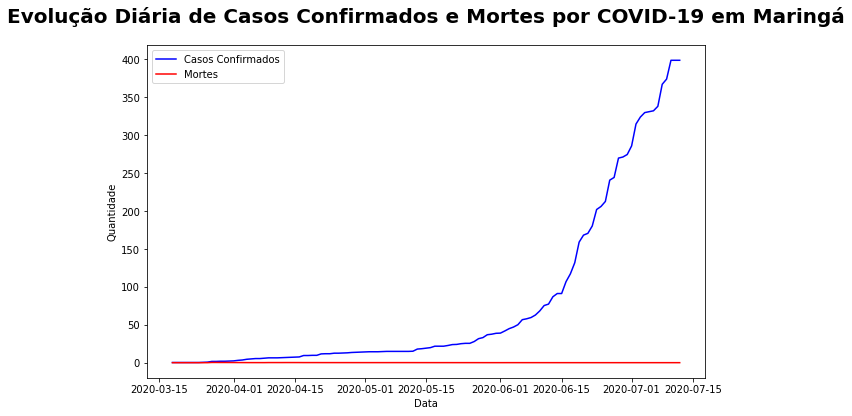

In [ ]:
# Filtrar dados para a cidade de Blumenau
maringa_data = df[df['city'] == 'Maringá']

# Criar gráfico de linha para casos confirmados e mortes
plt.figure(figsize=(10, 6))
plt.plot(maringa_data['date'], maringa_data['last_available_confirmed_per_100k_inhabitants'], color='b', label='Casos Confirmados')
plt.plot(maringa_data['date'], maringa_data['last_available_death_rate'], color='r', label='Mortes')

plt.title('Evolução Diária de Casos Confirmados e Mortes por COVID-19 em Maringá', fontsize=20, y=1.05, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(False)
plt.show()

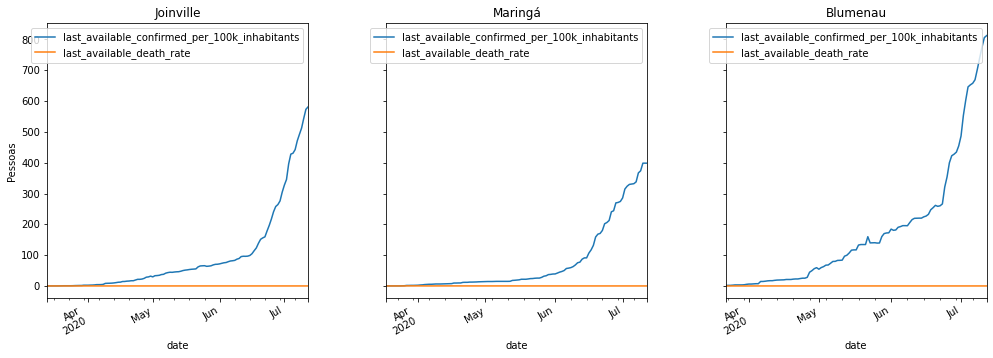

In [ ]:
#Fazer grafico lado a lado com a mesma proporção do eixo y para as cidades de Joinville, Maringá e Blumenau

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,5))

lines = ['last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate']
df[df['city'] == 'Joinville'].plot('date', lines, ax=ax1)
df[df['city'] == 'Maringá'].plot('date', lines, ax=ax2)
df[df['city'] == 'Blumenau'].plot('date', lines, ax=ax3)

ax1.set_title('Joinville')
ax2.set_title('Maringá')
ax3.set_title('Blumenau')
ax1.set_ylabel('Pessoas')

#Ajuste das labels dos tres graficos
for ax in [ax1, ax2, ax3]:
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.subplots_adjust(left=0.11, bottom=0.175, right=0.980, top=0.940, wspace=0.3, hspace=None)

Numeros populacionais das cidades para realizar a comparação do grupo G

População de Joinville: 590.466 Habitantes

População de Maringá: 423.666 Habitantes

População de Blumenau: 357.199 Habitantes


Podemos visualizar atraves desses 3 graficos que a cidade de blumenau esteve a partir de julho de 2020 em uma situação extremamente crítica de  casos de covid, pois realizando a comparação entre essas duas cidades, sendo que Joinville possui uma população onde seria quase do dobro da população de Blumenau possuindo praticamente a mesma quantidade de casos confirmados.

A cidade de Maringá chegou em um apice de 1700 casos de covid sendo 50% menor que a cidade de Joinville

## 5 maiores cidades de São Paulo (pop) excluindo a capital

In [ ]:
# Filtrar dados para o Estado de São Paulo retirando a capital

cidades_sao_paulo = df.query('state == "SP" & place_type == "city" & city != "São Paulo"')

In [ ]:
cidades_sao_paulo = cidades_sao_paulo.sort_values('estimated_population_2019', ascending = False)

In [ ]:
cidades_sao_paulo.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
128028,Guarulhos,3518800.00,2020-05-27,22,1379182.00,False,False,2236,162.13,2020-05-27,0.11,241,72,city,SP,87,13,2020,5,27,Sudeste
321152,Guarulhos,3518800.00,2020-07-06,28,1379182.00,False,False,7747,561.71,2020-07-06,0.10,756,112,city,SP,47,0,2020,7,6,Sudeste
76898,Guarulhos,3518800.00,2020-05-13,20,1379182.00,False,False,1189,86.21,2020-05-13,0.12,142,58,city,SP,64,9,2020,5,13,Sudeste
273580,Guarulhos,3518800.00,2020-06-27,26,1379182.00,False,False,6214,450.56,2020-06-27,0.11,668,103,city,SP,282,12,2020,6,27,Sudeste
2030,Guarulhos,3518800.00,2020-03-26,13,1379182.00,False,False,9,0.65,2020-03-26,0.11,1,10,city,SP,4,0,2020,3,26,Sudeste


In [ ]:
cidades_sao_paulo.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
294474,Borá,3507209.00,2020-07-01,27,837.00,False,False,1,119.47,2020-07-01,0.00,0,29,city,SP,0,0,2020,7,1,Sudeste
321026,Borá,3507209.00,2020-07-06,28,837.00,False,False,1,119.47,2020-07-06,0.00,0,34,city,SP,0,0,2020,7,6,Sudeste
194511,Borá,3507209.00,2020-06-11,24,837.00,False,False,1,119.47,2020-06-11,0.00,0,9,city,SP,0,0,2020,6,11,Sudeste
208747,Borá,3507209.00,2020-06-14,25,837.00,False,False,1,119.47,2020-06-14,0.00,0,12,city,SP,0,0,2020,6,14,Sudeste
310376,Borá,3507209.00,2020-07-04,27,837.00,False,False,1,119.47,2020-07-04,0.00,0,32,city,SP,0,0,2020,7,4,Sudeste


In [ ]:
#Verificar as 5 maiores cidades de são paulo

top_cinco_sao_paulo = cidades_sao_paulo['city'].unique()

In [ ]:
top_cinco_sao_paulo[:5]

array(['Guarulhos', 'Campinas', 'São Bernardo do Campo',
       'São José dos Campos', 'Santo André'], dtype=object)

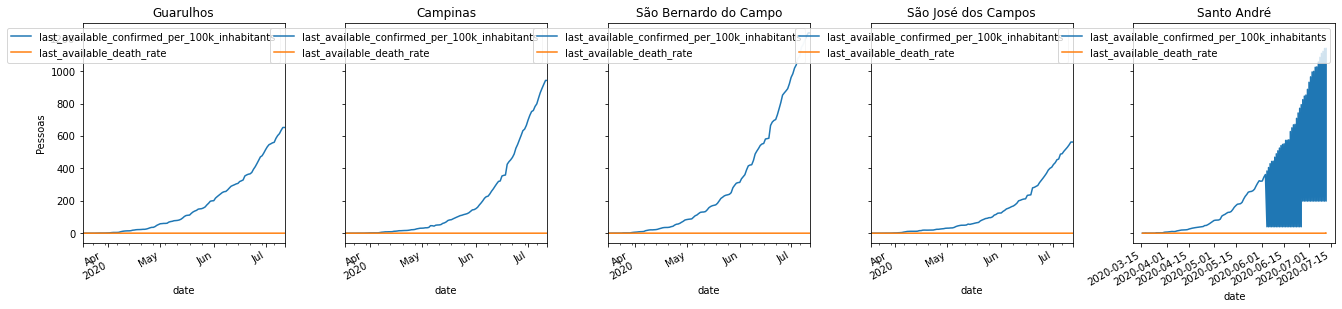

In [ ]:
#Fazer grafico lado a lado com a mesma proporção do eixo y para as cidades de Guarulhos, Campinas, São Bernardo do Campo,
#São José dos Campos, e Santo André

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize=(20,4))

lines = ['last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate']
df[df['city'] == 'Guarulhos'].plot('date', lines, ax=ax1)
df[df['city'] == 'Campinas'].plot('date', lines, ax=ax2)
df[df['city'] == 'São Bernardo do Campo'].plot('date', lines, ax=ax3)
df[df['city'] == 'São José dos Campos'].plot('date', lines, ax=ax4)
df[df['city'] == 'Santo André'].plot('date', lines, ax=ax5)

ax1.set_title('Guarulhos')
ax2.set_title('Campinas')
ax3.set_title('São Bernardo do Campo')
ax4.set_title('São José dos Campos')
ax5.set_title('Santo André')
ax1.set_ylabel('Pessoas')

#Ajuste das labels dos tres graficos
for ax in [ax1, ax2, ax3, ax4, ax5]:
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.subplots_adjust(left=0.11, bottom=0.175, right=0.980, top=0.940, wspace=0.3, hspace=None)

As cidades de

In [ ]:
top_cinco_sao_paulo = top_cinco_sao_paulo.sort_values('last_available_death_rate', ascending=False)

NameError: name 'top_cinco_sao_paulo' is not defined

In [ ]:
# Avaliando a taxa de mortalidade das 5 maiores cidades de são paulo (excluindo a capital utilizando os dados da coluna "last_available_death_rate"

print("Visualização das taxas de mortalidade das capitais:")
plt.figure(figsize=(18, 8))
sns.barplot(x='city', y='last_available_death_rate', data=top_cinco_sao_paulo)
plt.xticks(rotation=90)
plt.ylabel('Taxa de Mortalidade')
plt.title('Taxa de Mortalidade por COVID-19 5 maiores cidades do Estado de São Paulo', fontsize=20, y=1.05, fontweight='bold')
plt.show()

##5 maiores cidades da região norte (pop) excluindo a capitais

In [ ]:
# Filtrar as cidades da região Norte

cidades_regiao_norte = df[(df['regiao'] == 'Norte') & (df['place_type'] == 'city')]

#Listando as capitais da região Norte

capitais_regiao_norte = ['Porto Velho', 'Rio Branco', 'Manaus', 'Boa Vista', 'Belém', 'Macapá', 'Palmas']

#Excluindo as capitais

cidades_regiao_norte = cidades_regiao_norte[~cidades_regiao_norte['city'].isin(capitais_regiao_norte)]

#Ordenando as cidades pela população

cidades_regiao_norte = cidades_regiao_norte.sort_values(by='estimated_population_2019', ascending=False)

In [ ]:
#Verificar as 5 maiores cidades de são paulo

top_cidades_norte = cidades_regiao_norte['city'].unique()

In [ ]:
top_cidades_norte[:5]

array(['Ananindeua', 'Santarém', 'Marabá', 'Parauapebas', 'Castanhal'],
      dtype=object)

In [ ]:
top_cidades_norte

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,ano,mes,dia,regiao
19642,Ananindeua,1500800.00,2020-04-18,16,530598.00,False,False,68,12.82,2020-04-18,0.01,1,25,city,PA,1,0,2020,4,18,Norte
134397,Ananindeua,1500800.00,2020-05-29,22,530598.00,False,False,2624,494.54,2020-05-29,0.09,239,66,city,PA,57,6,2020,5,29,Norte
18288,Ananindeua,1500800.00,2020-04-17,16,530598.00,False,False,67,12.63,2020-04-17,0.01,1,24,city,PA,17,1,2020,4,17,Norte
164804,Ananindeua,1500800.00,2020-06-05,23,530598.00,False,False,3112,586.51,2020-06-05,0.09,285,73,city,PA,125,4,2020,6,5,Norte
122090,Ananindeua,1500800.00,2020-05-26,22,530598.00,False,False,2366,445.91,2020-05-26,0.10,226,63,city,PA,84,4,2020,5,26,Norte


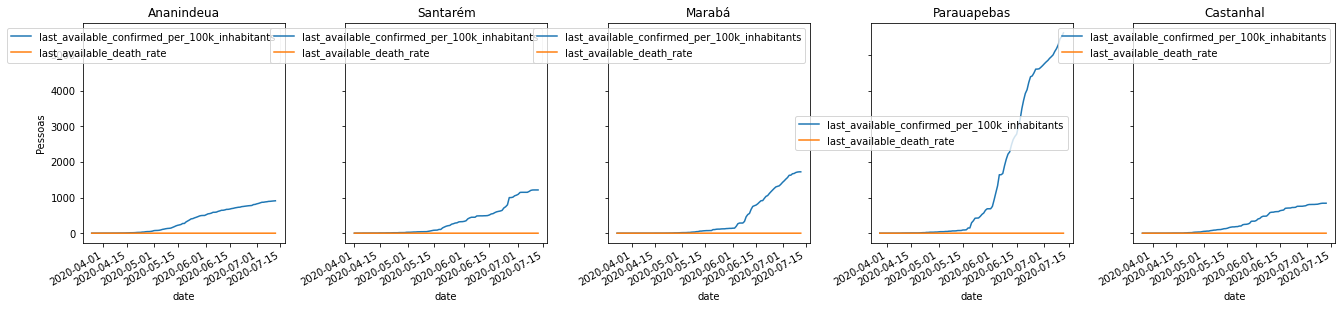

In [ ]:
#Fazer grafico lado a lado com a mesma proporção do eixo y para as cidades de Ananindeua, Santarém, Marabá, Parauapebas e Castanhal

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize=(20,4))

lines = ['last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate']
cidades_regiao_norte[cidades_regiao_norte['city'] == 'Ananindeua'].plot('date', lines, ax=ax1)
cidades_regiao_norte[cidades_regiao_norte['city'] == 'Santarém'].plot('date', lines, ax=ax2)
cidades_regiao_norte[cidades_regiao_norte['city'] == 'Marabá'].plot('date', lines, ax=ax3)
cidades_regiao_norte[cidades_regiao_norte['city'] == 'Parauapebas'].plot('date', lines, ax=ax4)
cidades_regiao_norte[cidades_regiao_norte['city'] == 'Castanhal'].plot('date', lines, ax=ax5)

ax1.set_title('Ananindeua')
ax2.set_title('Santarém')
ax3.set_title('Marabá')
ax4.set_title('Parauapebas')
ax5.set_title('Castanhal')
ax1.set_ylabel('Pessoas')

#Ajuste das labels dos tres graficos
for ax in [ax1, ax2, ax3, ax4, ax5]:
  for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.subplots_adjust(left=0.11, bottom=0.175, right=0.980, top=0.940, wspace=0.3, hspace=None)

Analisando as cidades da região norte, retirando as capitais podemos notar que a cidade de Parauapebas/PA foi a cidade com maior quantidade de casos confirmados sendo a que e a cidade de castanhal com o menor numero de casos confirmados.

In [ ]:
top_cidades_norte = top_cidades_norte.sort_values('last_available_death_rate', ascending=False)

In [ ]:
# Avaliando a taxa de mortalidade das 5 maiores cidades de são paulo (excluindo a capital utilizando os dados da coluna "last_available_death_rate"

print("Visualização das taxas de mortalidade das capitais:")
plt.figure(figsize=(18, 8))
sns.barplot(x='city', y='last_available_death_rate', data=top_cidades_norte)
plt.xticks(rotation=90)
plt.ylabel('Taxa de Mortalidade')
plt.title('Taxa de Mortalidade por COVID-19 5 maiores cidades da Região Norte', fontsize=20, y=1.05, fontweight='bold')
plt.show()

In [ ]:
#Para fazer um histograma
#sp_untransformed = sns.distplot(housing['SalePrice']) #housing é o dataset e salesPrices a variavel a ser analisada